In [49]:
import h5py
import re
import matplotlib.pyplot as plt


from MalardClient.MalardClient import MalardClient
from MalardClient.DataSet import DataSet
from MalardClient.BoundingBox import BoundingBox

In [50]:
file = 'ATL06_20190502104533_05220304_001_01.h5'

path = "/data/slug1/holding/ICESat/"


hf = h5py.File("{}{}".format(path, file), 'r')

matchObj = re.findall(r'ATL06_(\d+)', file)
dataTime = datetime.strptime(matchObj[0], '%Y%m%d%H%M%S')

print(dataTime)


2019-05-02 10:45:33


In [51]:
print(hf.keys())

<KeysViewHDF5 ['METADATA', 'ancillary_data', 'gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r', 'orbit_info', 'quality_assessment']>


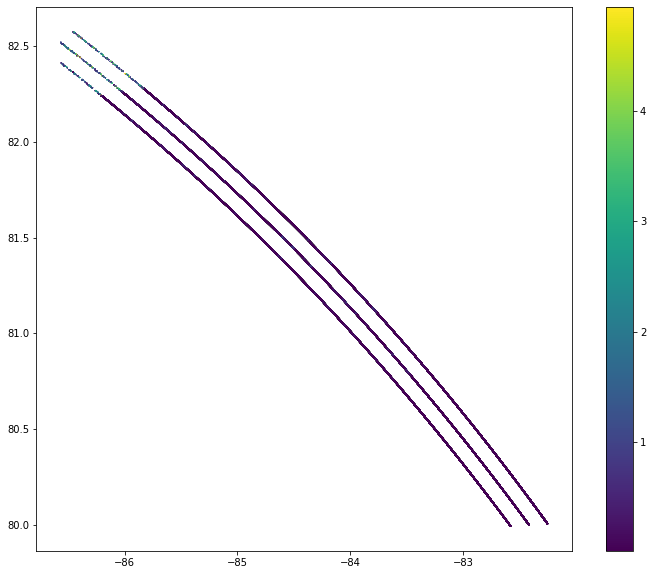

In [40]:

tracks = [  t for t in hf.keys() if t.startswith("gt")  ]


def mask_fillvalue( lons, lats, elevs, rms, fillValue ):
    
    
    mask = [ i for i,e in enumerate(elevs) if e < 100000 ]
        
    lonsM = []
    latsM = []
    elevsM = []
    rmsM = []
        
    for i in mask:
        lonsM.append(lons[i])
        latsM.append(lats[i])
        elevsM.append(elevs[i])
        rmsM.append(rms[i])
        
    return ( lonsM, latsM, elevsM, rmsM )


plt.figure(figsize=(12,10))
for t in tracks:
    for h in hf[t]['land_ice_segments']:
        fillValue = 3.4028235E38
        elevs = hf[t]['land_ice_segments']['h_li']
        rms =  hf[t]['land_ice_segments']['h_li_sigma']
        lats = hf[t]['land_ice_segments']['latitude']
        longs = hf[t]['land_ice_segments']['longitude']
        
        ( lonsM, latsM, elevsM, rmsM ) = mask_fillvalue( longs, lats, elevs, rms, fillValue )
        
        plt.scatter(x=lonsM, y=latsM, c=rmsM, marker='.', s=0.1)

plt.colorbar()
        
            

In [46]:
client = MalardClient()

from datetime import datetime

ds = DataSet( 'test','icesat2','greenland' )

bb = client.boundingBox(ds)

results = client.executeQuery(ds, bb )

In [47]:
df = results.to_df

print( len(df) )

5290


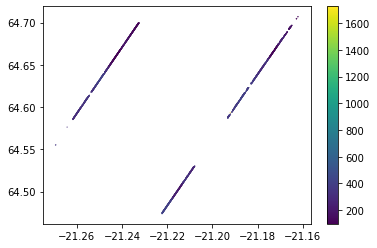

In [48]:
plt.scatter(x=df['lon'], y=df['lat'], c=df['elev'], marker='.', s=0.1)
plt.colorbar()

In [32]:
print(df.columns)

Index(['lon', 'lat', 'elev', 'heading', 'demDiff', 'demDiffMad', 'demDiffMad2',
       'phaseAmb', 'meanDiffSpread', 'wf_number', 'sampleNb', 'powerScaled',
       'powerdB', 'phase', 'phaseS', 'phaseSSegment', 'phaseConfidence', 'coh',
       'x', 'y', 'time', 'swathFileId', 'rowId'],
      dtype='object')
